In [1]:
import numpy as np
import pandas as pd

In [2]:
# read csv file
df = pd.read_csv('loan_approval_dataset.csv')

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
# datatypes of dataframe
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [32]:
# remove extra spaces
df.columns = df.columns.str.strip()

In [6]:
# combing all the assets value
df['total_assets_value'] = df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value']

In [7]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets_value
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,50700000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000


In [8]:
# remove unwanted column
df.drop(['loan_id', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'], axis=1, inplace=True)

In [9]:
# number of rows and column
df.shape

(4269, 9)

In [10]:
# check nan values
df.isna().sum()

no_of_dependents      0
education             0
self_employed         0
income_annum          0
loan_amount           0
loan_term             0
cibil_score           0
loan_status           0
total_assets_value    0
dtype: int64

In [11]:
df.corr(numeric_only=True)

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,total_assets_value
no_of_dependents,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.005289
income_annum,0.007266,1.000000,0.927470,0.011488,-0.023034,0.931845
loan_amount,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.867067
loan_term,-0.020111,0.011488,0.008437,1.000000,0.007810,0.010131
cibil_score,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.023433
total_assets_value,0.005289,0.931845,0.867067,0.010131,-0.023433,1.000000


In [29]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,total_assets_value
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000


In [30]:
df.to_csv('cleaned_loan_approval_dataset.csv', index=False) 

In [12]:
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
import seaborn as sns
%matplotlib inline

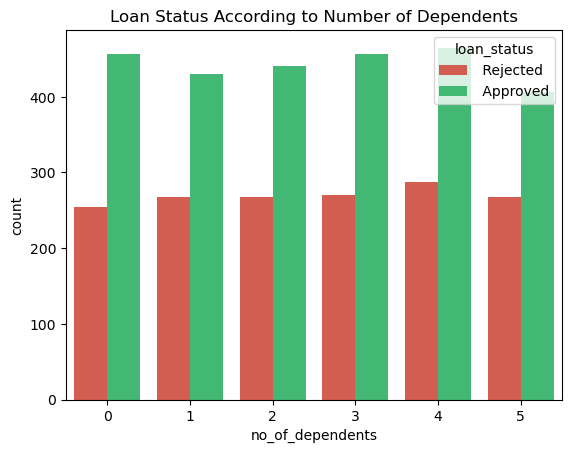

In [26]:
# loan status according to number of dependent
sns.countplot(x='no_of_dependents', data=df, hue='loan_status', palette=['#e74c3c', '#2ecc71'])
plt.title('Loan Status According to Number of Dependents')
plt.show()

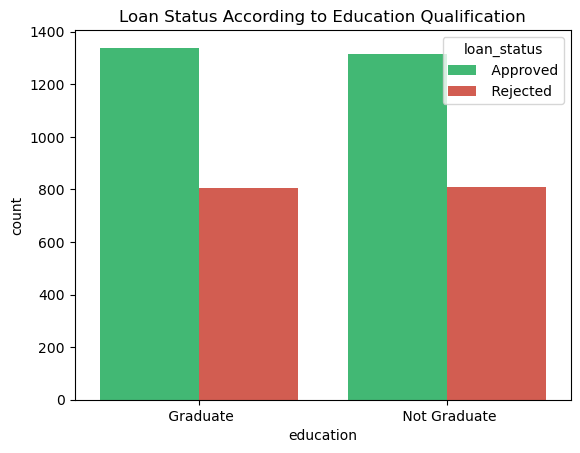

In [27]:
# loan status according to education qualification
plt.title('Loan Status According to Education Qualification')
sns.countplot(x='education', data=df, hue='loan_status', palette=['#2ecc71', '#e74c3c'])
plt.show()

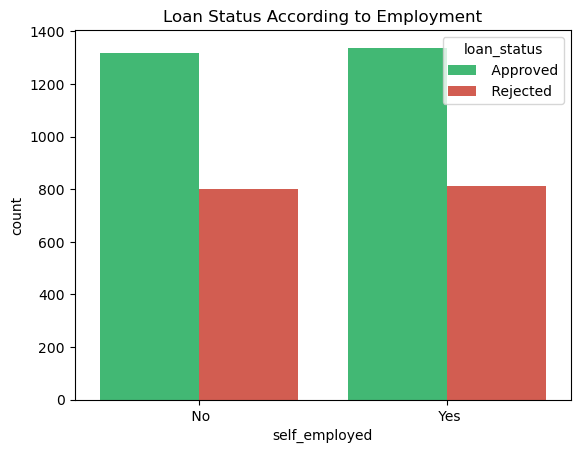

In [28]:
# loan status according to employment
plt.title('Loan Status According to Employment')
sns.countplot(x='self_employed', data=df, hue='loan_status', palette=['#2ecc71', '#e74c3c'])
plt.show()

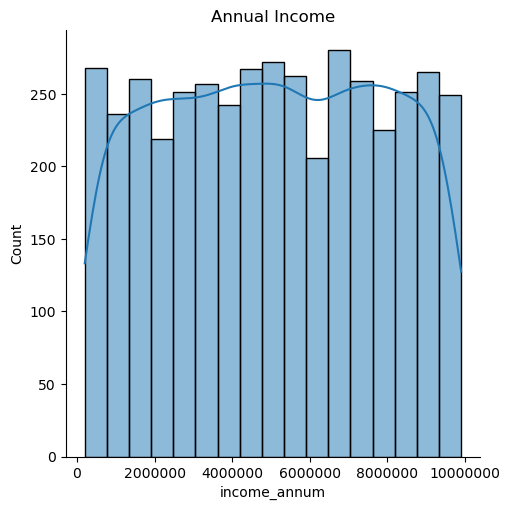

In [18]:
# annual income range
sns.displot(df['income_annum'], kde=True)
plt.title('Annual Income')
plt.ticklabel_format(style='plain', axis='x')

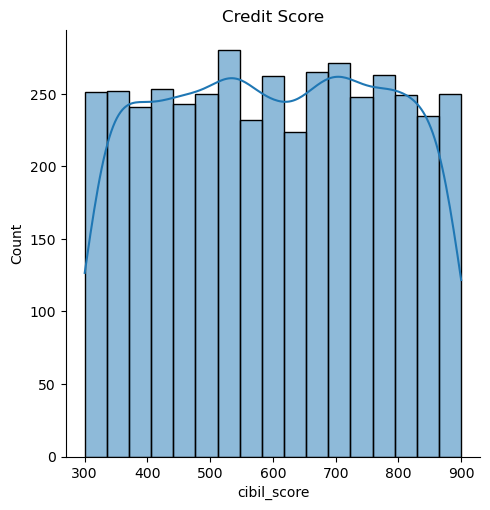

In [23]:
# credit score range
sns.displot(df['cibil_score'], kde=True)
plt.title('Credit Score')
plt.show()

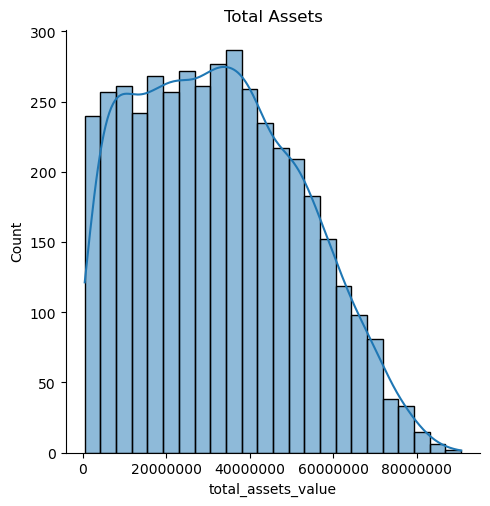

In [25]:
# total assets
sns.displot(df['total_assets_value'], kde=True)
plt.title('Total Assets')
plt.ticklabel_format(style='plain', axis='x')